In [6]:
import os
os.chdir('/home/hugo-dev/esirem-dev/4a/kmutt/kmutt_v2')

In [7]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [8]:
DATA_PATH = "./data/data_25ms_0%_6mfcc.json"

In [9]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [10]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [11]:
# load data
X, y = load_data(DATA_PATH)

# create the scaler
scaler = StandardScaler()

# fit and transform the data
X = X.reshape(X.shape[0], -1)
X = scaler.fit_transform(X)

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Data succesfully loaded!


In [12]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1],)),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(3, activation='softmax')
])

/home/hugo-dev/esirem-dev/4a/kmutt/kmutt_v2/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,555 (592.01 KB)

 Trainable params: 151,555 (592.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6127/6127 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.5930 - loss: 1.1574 - val_accuracy: 0.6395 - val_loss: 0.8713
Epoch 2/10
6127/6127 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.6388 - loss: 0.8590 - val_accuracy: 0.6483 - val_loss: 0.8018
Epoch 3/10
6127/6127 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.6502 - loss: 0.8043 - val_accuracy: 0.6560 - val_loss: 0.7791
Epoch 4/10
6127/6127 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.6531 - loss: 0.7863 - val_accuracy: 0.6585 - val_loss: 0.7700
Epoch 5/10
6127/6127 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.6536 - loss: 0.7809 - val_accuracy: 0.6613 - val_loss: 0.7652
Epoch 6/10
6127/6127 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.6571 - loss: 0.7755 - val_accuracy: 0.6602 - val_loss: 0.7625
Epoch 7/10
6127/6127 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.6578 - loss: 0.7722 - val_accuracy: 0.6650 - val_loss: 0.7587
Epoch 8/10
6127/6127 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.6593 - loss: 0

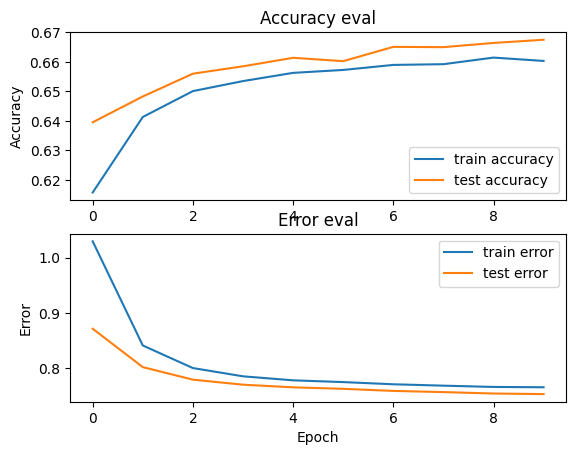

In [13]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

# plot accuracy and error as a function of the epochs
plot_history(history)

In [14]:
# predict on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

2626/2626 - 5s - 2ms/step - accuracy: 0.6675 - loss: 0.7530

Test accuracy: 0.6674521565437317


In [15]:
# predict on a sample
X_to_predict = X_test[100]
y_to_predict = y_test[100]
X_to_predict = X_to_predict[np.newaxis, ...]
prediction = model.predict(X_to_predict)
predicted_index = np.argmax(prediction)
print(f"Target: {y_to_predict}, Predicted label: {predicted_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Target: 1, Predicted label: 2
